# Movie Genre Data Analysis ###

## Introduction

We are going to focus highly on genre's. I want to know everthing about Genre's.

Here are some things I want to look at:

### Research Questions (Q):

1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revunue?
3. Which genres have high avg. profit?
4. Which genres have high avg. popularity?
5. Which geners have highest number of movies with an voting avg. >= 8?

### Reserach Hypotheses (H):

1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high profit and revenue.
4. Highly budgeted movies have high popularity.

In [106]:
import pandas as pd

movies = pd.read_csv(r'E:\JupyterProjects\Projects\Movie Genres\imdb_movies.csv')

In [107]:
pd.set_option('display.max.rows', 11000) 
pd.set_option('display.max.columns', 22)

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [108]:
#movies[movies.duplicated()]
movies.drop_duplicates(inplace=True)
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [109]:
movies.dropna(subset = ['genres'], inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [110]:
# _adj means adjusted for inflation
movies['profit'] = movies['revenue'] - movies['budget']

In [111]:

movies_genre = movies[['popularity', 'budget','revenue', 'profit', 'original_title', 'runtime', 'genres', 'release_date', 'release_year', 'vote_count', 'vote_average']]
movies_genre.head()

,popularity,budget,revenue,profit,original_title,runtime,genres,release_date,release_year,vote_count,vote_average
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,5562,6.500000
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,6185,7.100000
2,13.112507,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2015,2480,6.300000
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,5292,7.500000
4,9.335014,190000000,1506249360,1316249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2015,2947,7.300000


In [112]:
from pandas import Series, DataFrame

#Applying all of the data into its own series
# 1 notates the y axis
# Stack reformats the dataframe into a multi-index
split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\robin\AppData\Local\Temp\ipykernel_10328\709004806.py:6: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()


In [27]:
movies_genre

,popularity,budget,revenue,profit,original_title,runtime,release_date,vote_count,vote_average,genres_split
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Action
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Adventure
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Science Fiction
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.5,Thriller
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,Action
...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,Mystery
10863,0.065141,0,0,0,Beregis Avtomobilya,94,1/1/66,11,6.5,Comedy
10864,0.064317,0,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,Action
10864,0.064317,0,0,0,"What's Up, Tiger Lily?",80,11/2/66,22,5.4,Comedy


dsa

### Research Questions (Q):

1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revunue?
3. Which genres have high avg. profit?
4. Which genres have high avg. popularity?
5. Which geners have highest number of movies with an voting avg. >= 8?

1. Which genres are the most common (number of movies made)?

In [41]:
#Creates a Series instead of a datafram which is needed to manipulate the index
#movies_genre.groupby('genres_split')['original_title'].count().sort_values(ascending = False)
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title' ,ascending = True)

In [38]:
genres_count

,original_title
genres_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

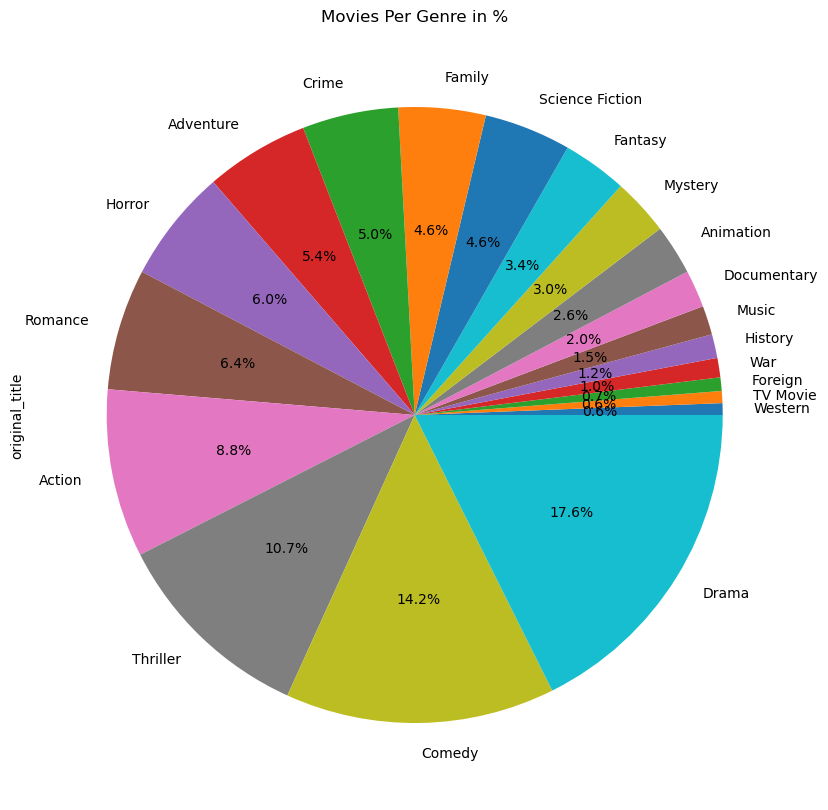

In [43]:
genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct = '%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

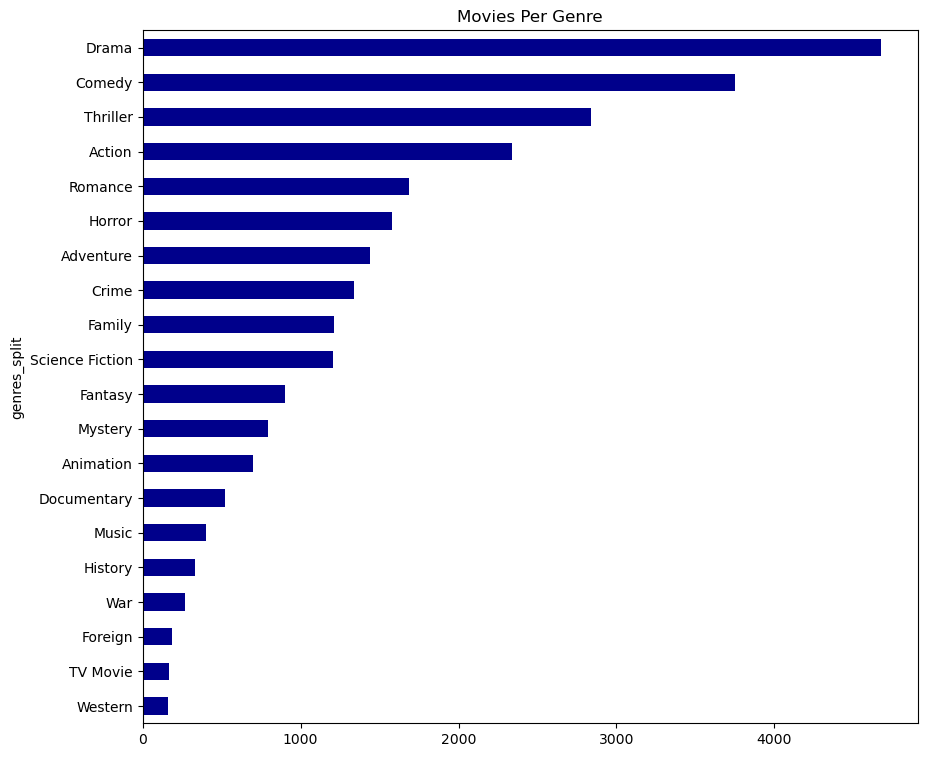

In [44]:
genres_count['original_title'].plot.barh(title = 'Movies Per Genre', color = 'DarkBlue', figsize = (10,9))

2. Which genres have high avg. budget and revunue?

In [49]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only = True)
pd.options.display.float_format = '{:2f}'.format
genres_avg

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
genres_split,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,45066911.671141,104.917785,392.993708,5.787752
Adventure,1.154259,37543694.530931,113137861.069341,75594166.538409,106.173351,513.125085,5.940585
Animation,0.852182,23159781.606581,75256062.223176,52096280.616595,68.181688,303.000000,6.403147
Comedy,0.592607,13297915.618244,37526242.072238,24228326.453994,96.745057,176.436330,5.905167
Crime,0.744930,17663801.124815,42368661.645495,24704860.520679,106.917282,278.805022,6.124889
Documentary,0.181432,577149.148077,2041106.994231,1463957.846154,102.651923,35.105769,6.908462
Drama,0.591495,11880717.773529,29232255.725840,17351537.952311,110.478151,182.544538,6.165546
Family,0.786668,23359337.420796,72433176.373680,49073838.952884,89.603574,272.320877,5.997563
Fantasy,0.992840,32612585.348253,96313657.081878,63701071.733624,100.736900,420.741266,5.863537


In [55]:
genres_avg.sort_values('revenue', ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

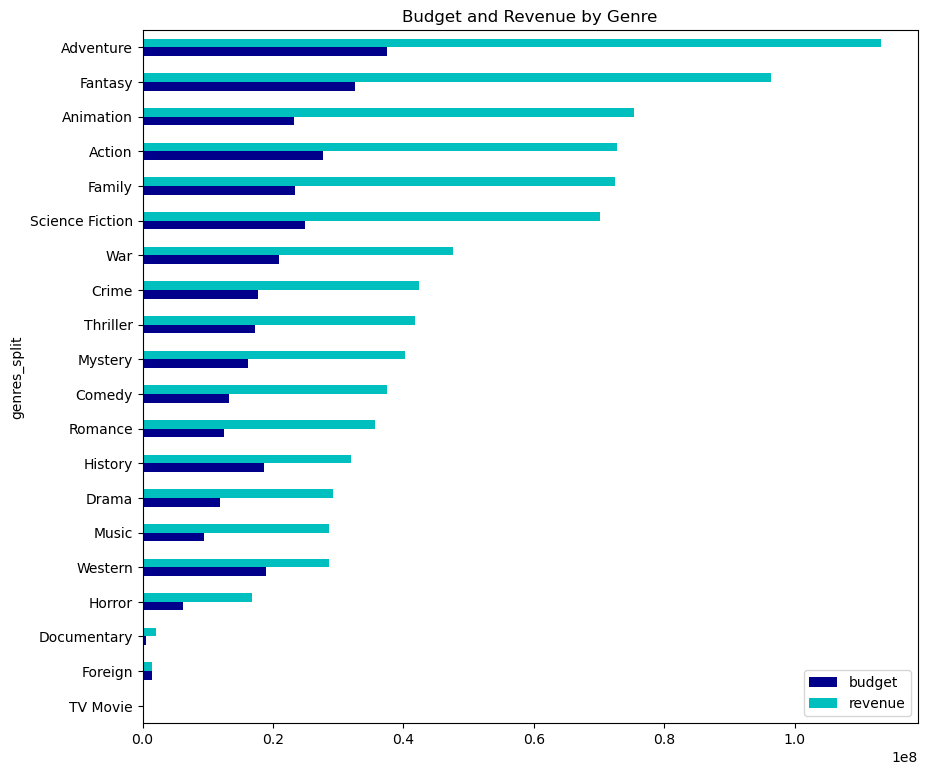

In [56]:
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('DarkBlue', 'c'), figsize = (10,9))

3. Which genres have high avg. profit?

In [57]:
genres_avg

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
genres_split,,,,,,,
TV Movie,0.270896,267664.670659,251497.005988,-16167.664671,91.982036,34.365269,5.788024
Foreign,0.191496,1451434.925532,1520459.835106,69024.909574,107.228723,16.627660,5.981383
Documentary,0.181432,577149.148077,2041106.994231,1463957.846154,102.651923,35.105769,6.908462
Horror,0.465357,6226529.210751,16822808.624313,10596279.413561,94.424557,120.059866,5.337447
Western,0.590615,18974107.975758,28568709.284848,9594601.309091,117.575758,205.739394,6.083030
Music,0.487321,9438627.549020,28571768.691176,19133141.142157,105.137255,124.340686,6.480392
Drama,0.591495,11880717.773529,29232255.725840,17351537.952311,110.478151,182.544538,6.165546
History,0.575936,18594919.302395,32011793.215569,13416873.913174,136.206587,183.772455,6.410479
Romance,0.592082,12531271.847547,35691972.327103,23160700.479556,106.891355,166.070678,6.042874


In [58]:
genres_avg.sort_values('profit', ascending = True, inplace = True)

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

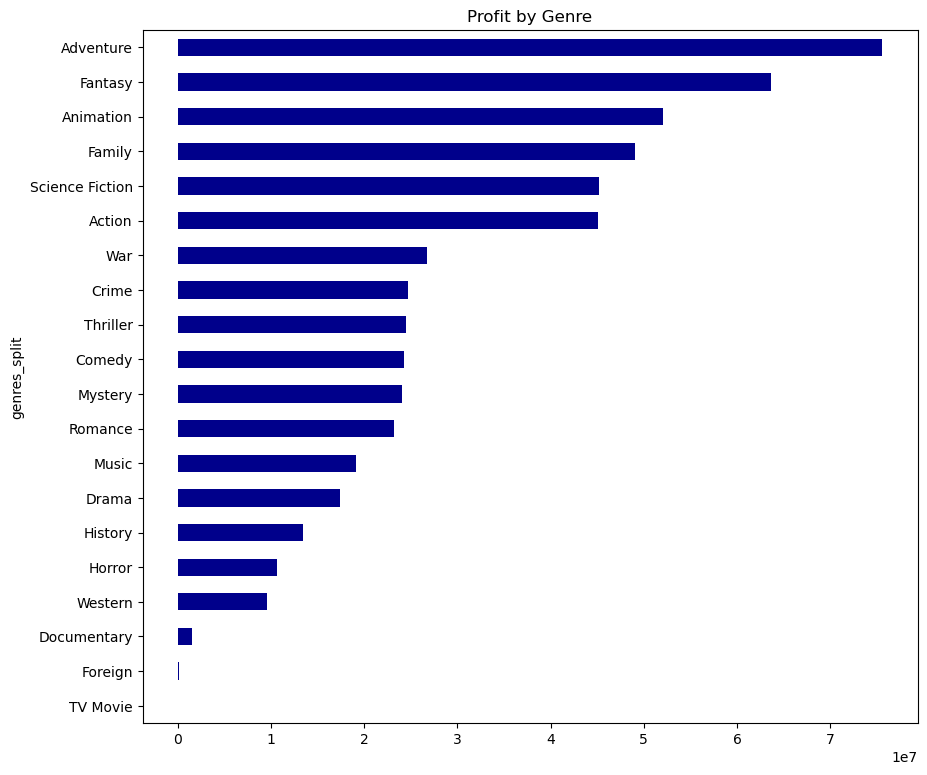

In [59]:
genres_avg['profit'].plot.barh(title = 'Profit by Genre', color = ('DarkBlue'), figsize = (10,9))

4. Which genres have high avg. popularity?

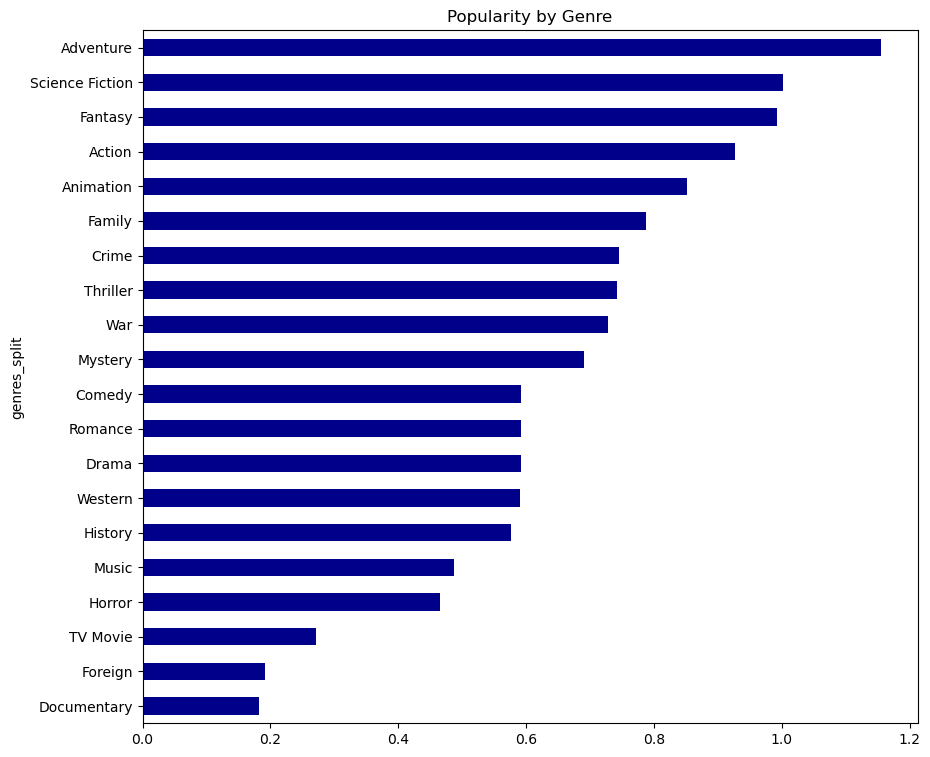

In [67]:
genres_avg.sort_values('popularity', ascending = True, inplace = True)
genres_avg['popularity'].plot.barh(title = 'Popularity by Genre', color = ('DarkBlue'), figsize = (10,9))

5. Which geners have highest number of movies with an voting avg. >= 8?

In [62]:
movies_genre.head()

,popularity,budget,revenue,profit,original_title,runtime,release_date,vote_count,vote_average,genres_split
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.500000,Action
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.500000,Adventure
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.500000,Science Fiction
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,5562,6.500000,Thriller
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,6185,7.100000,Action


In [68]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >= 8]

In [69]:
genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average' ,ascending = True)

In [70]:
genres_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

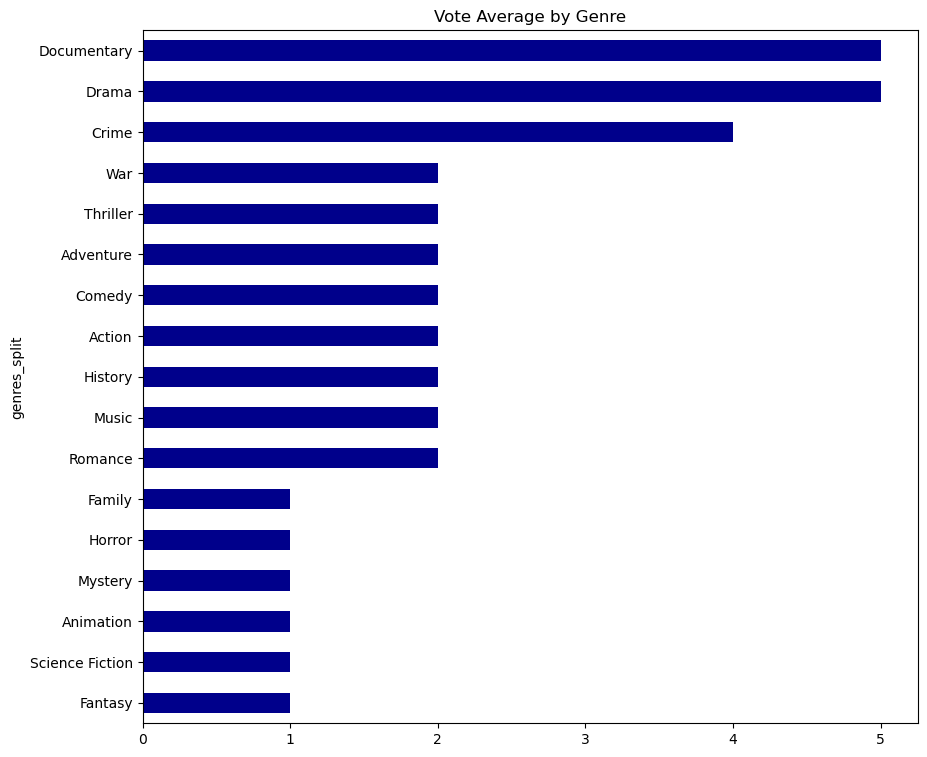

In [71]:
genres_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', color = ('DarkBlue'), figsize = (10,9))

<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

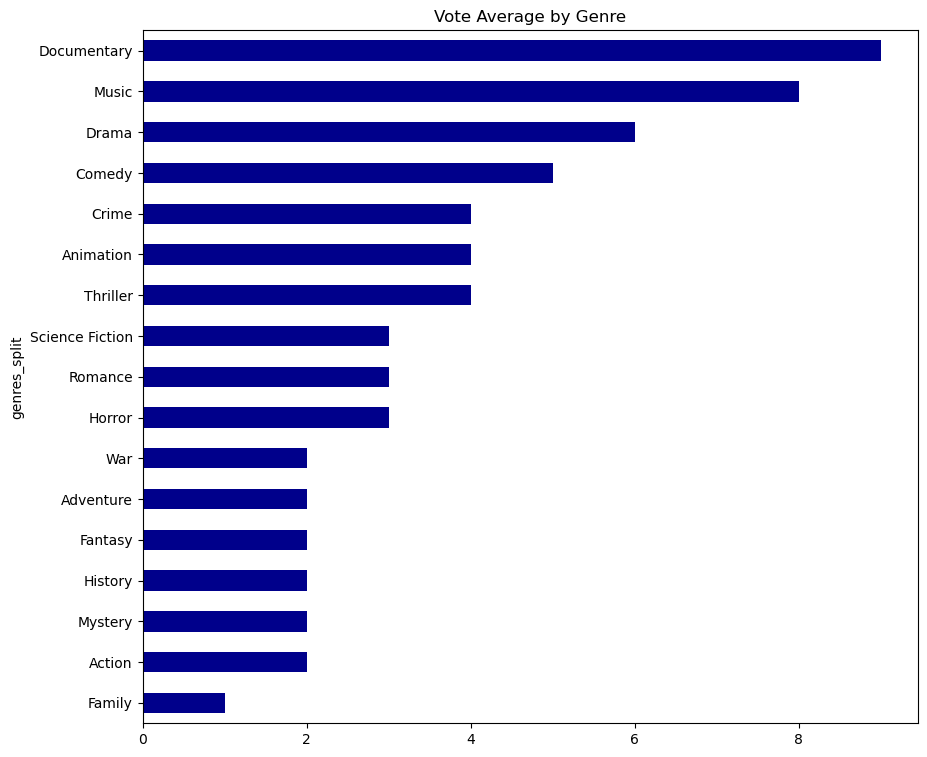

In [72]:
genres_vote_zero = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average' ,ascending = True)
genres_vote_zero['vote_average'].plot.barh(title = 'Vote Average by Genre', color = ('DarkBlue'), figsize = (10,9))

### Reserach Hypotheses (H):

1. The best movies according to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high profit and revenue.
4. Highly budgeted movies have high popularity.

In [76]:
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget','revenue', 'profit', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average']]

In [78]:
movies_genre.head()

,popularity,budget,revenue,profit,original_title,runtime,genres,release_date,vote_count,vote_average
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.500000
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.100000
2,13.112507,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.300000
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.500000
4,9.335014,190000000,1506249360,1316249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.300000


1. The best movies according to vote avg. return high profit and revenue.

In [82]:
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

movies_counted.corr(method = 'spearman', numeric_only = True)

,popularity,budget,revenue,profit,runtime,vote_count,vote_average
popularity,1.000000,0.485149,0.588739,0.498117,0.230518,0.768966,0.188670
budget,0.485149,1.000000,0.714828,0.334390,0.360230,0.554586,-0.044440
revenue,0.588739,0.714828,1.000000,0.842221,0.341707,0.682656,0.111731
profit,0.498117,0.334390,0.842221,1.000000,0.212060,0.583602,0.198308
runtime,0.230518,0.360230,0.341707,0.212060,1.000000,0.263460,0.285514
vote_count,0.768966,0.554586,0.682656,0.583602,0.263460,1.000000,0.284470
vote_average,0.188670,-0.044440,0.111731,0.198308,0.285514,0.284470,1.000000


<Axes: xlabel='vote_average', ylabel='revenue'>

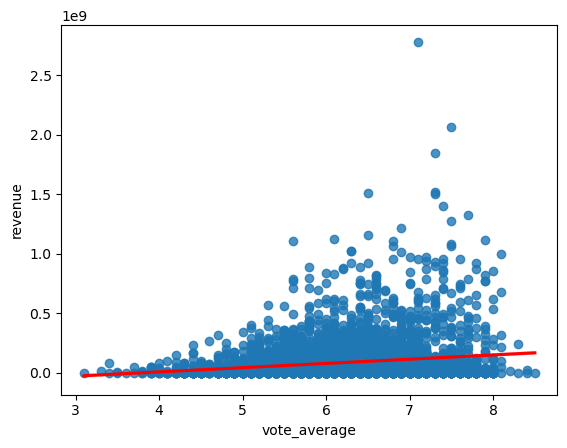

In [88]:
import seaborn as sns

sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})

2. The best movies according to popularity return high profit and revenue.

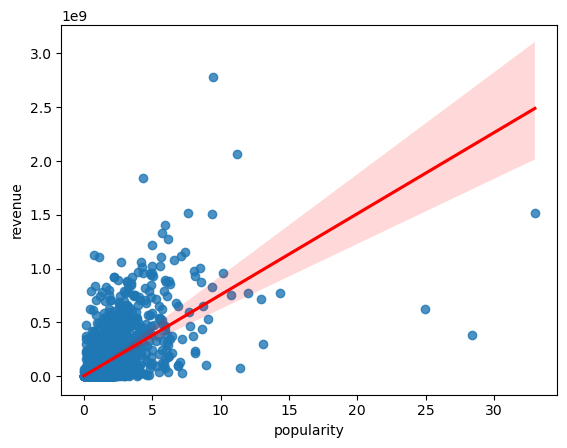

<Figure size 2000x1000 with 0 Axes>

In [89]:
import matplotlib.pyplot as plt
sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (20,10))
plt.show()

3. Highly budgeted movies return high profit

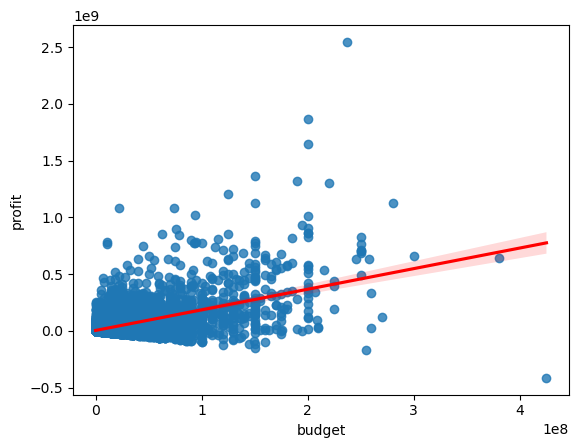

<Figure size 2000x1000 with 0 Axes>

In [90]:
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (20,10))
plt.show()

4. Highly budgeted movies have high popularity.

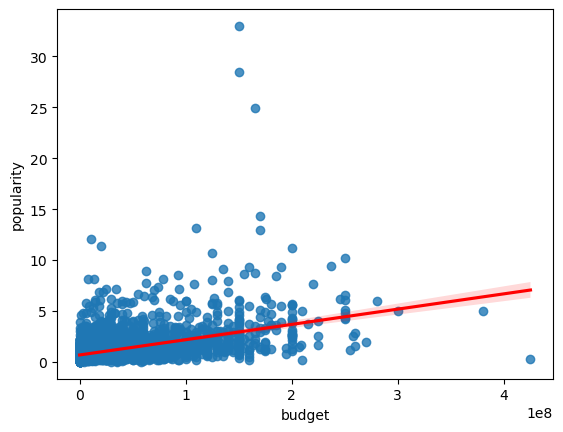

<Figure size 2000x1000 with 0 Axes>

In [91]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (20,10))
plt.show()

5. Look at profit per Genre per Year

In [104]:
from pandas import Series, DataFrame

#Applying all of the data into its own series
# 1 notates the y axis
# Stack reformats the dataframe into a multi-index
split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\robin\AppData\Local\Temp\ipykernel_10328\709004806.py:6: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series, 1).stack()


In [105]:
movies_genre.head()

,popularity,budget,revenue,profit,original_title,runtime,release_date,release_year,vote_count,vote_average,genres_split
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,2015,5562,6.500000,Action
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,2015,5562,6.500000,Adventure
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,2015,5562,6.500000,Science Fiction
0,32.985763,150000000,1513528810,1363528810,Jurassic World,124,6/9/15,2015,5562,6.500000,Thriller
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,120,5/13/15,2015,6185,7.100000,Action


In [113]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean())

In [117]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

Text(0.5, 1.0, 'Genres by Profit per Year')

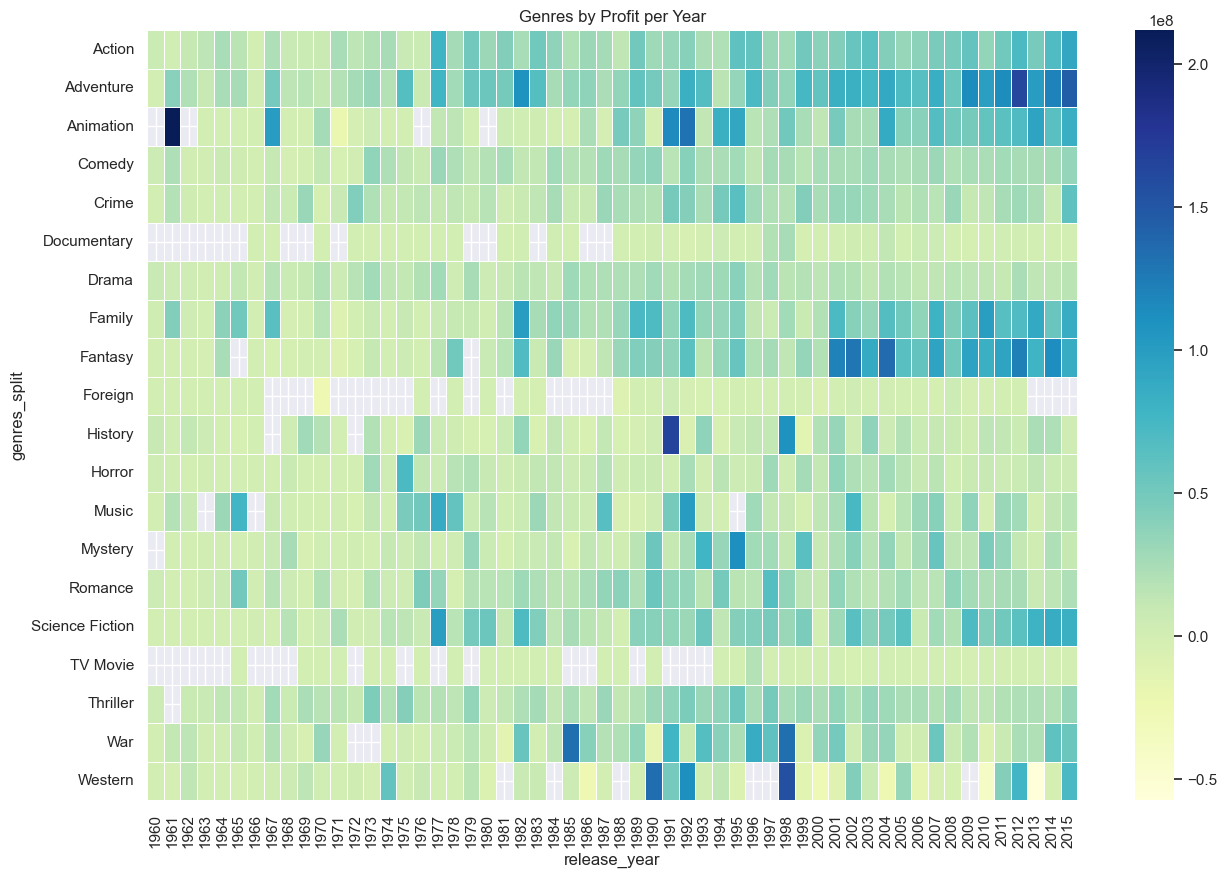

In [122]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(final_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title("Genres by Profit per Year")